In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV,Lasso
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\Peyo\Downloads\world-happiness-report-2021.csv")

df.head()


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


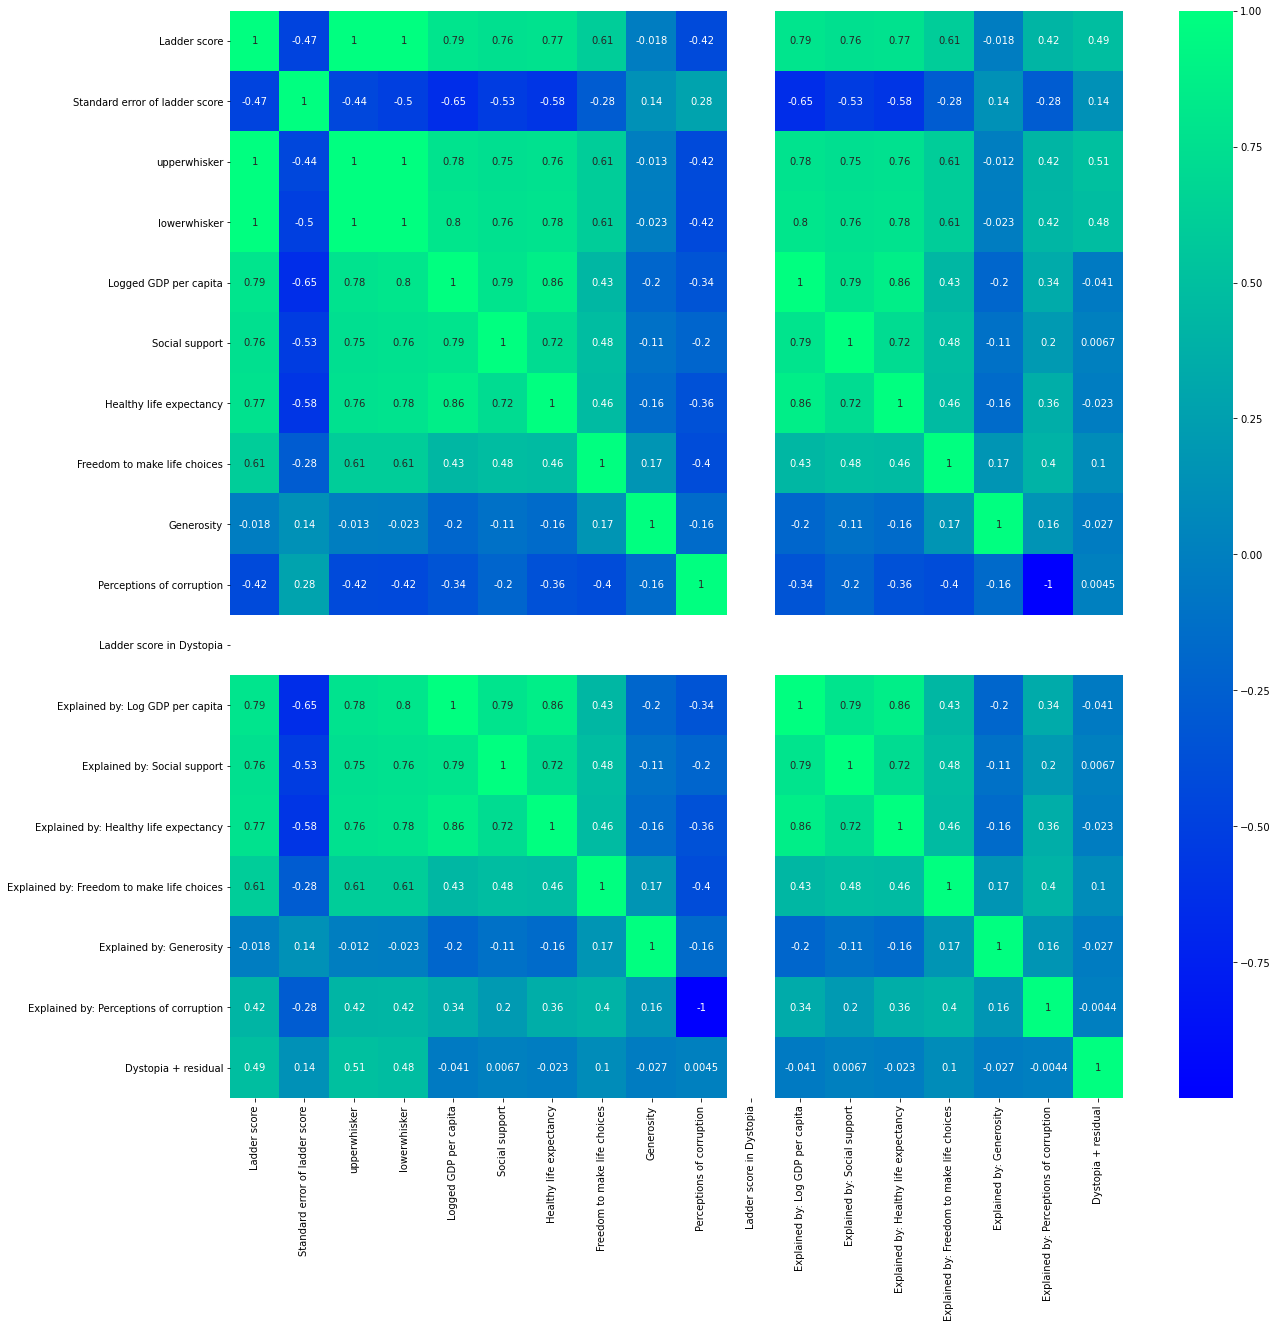

In [3]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True,cmap ='winter')
plt.show()

# Cette heatmap nous permet de choisir les features. Nous pouvons contaster que les explain by, ont exactement la même corrélation
# que les données brut utilisés pour le caculer sur le Ladderscore. Ils peuvent donc être supprimé de notre Data pour entrainer notre model
# de même Ladder score in Dystopia n'a aucun impact sur le ladderscore ou sur une autre feature.
# Egalement, nous pouvons éliminer les upper et lower whisker (qui représente ici l'interval de confiance du Ladder score)
#



In [4]:
## suppression des colones non utile pour la suite:

data = df.drop(["Country name","Regional indicator","Standard error of ladder score","upperwhisker","lowerwhisker", "Explained by: Log GDP per capita",
                "Explained by: Social support","Explained by: Healthy life expectancy","Explained by: Freedom to make life choices",
                "Explained by: Generosity","Explained by: Perceptions of corruption","Ladder score in Dystopia"], axis = 1)

In [5]:
data.head()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
1,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868
2,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839
3,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.967
4,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.798


In [6]:
Y = df['Ladder score']
data = data.drop("Ladder score", axis = 1)

In [7]:
scaler = StandardScaler()
Z = scaler.fit_transform(data)


In [8]:
X_train,X_test,y_train,y_test = train_test_split(Z,Y,test_size = 0.2, random_state = 666)

In [10]:
lasso = LassoCV(cv =10)

lasso.fit(X_train,y_train)




LassoCV(cv=10)

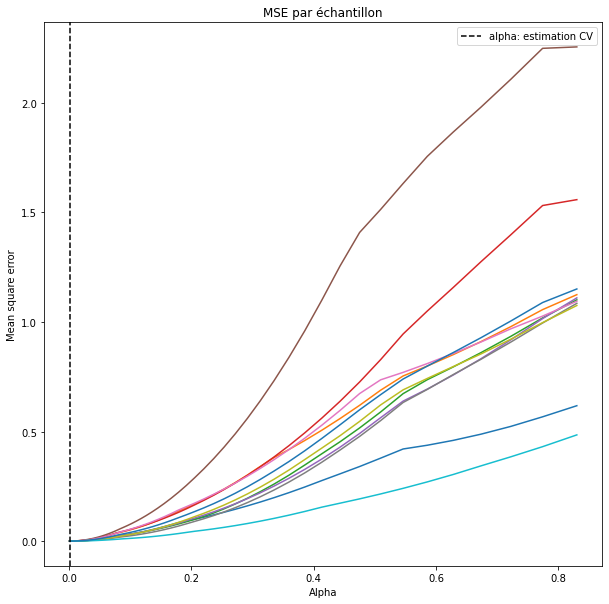

In [11]:
alphas = lasso.alphas_
mse = lasso.mse_path_

plt.figure(figsize =(10,10))
plt.plot(alphas,mse)
plt.plot(alphas,mse.mean(axis=1))
plt.axvline(lasso.alpha_,linestyle ="--", color ="k", label = "alpha: estimation CV")

plt.xlabel("Alpha")
plt.ylabel("Mean square error")
plt.title("MSE par échantillon")
plt.legend(),
plt.show()








In [12]:
print(lasso.alphas_)
print("\n")
print(lasso.alpha_)

[8.30031837e-01 7.74090469e-01 7.21919362e-01 6.73264413e-01
 6.27888645e-01 5.85571052e-01 5.46105523e-01 5.09299838e-01
 4.74974734e-01 4.42963026e-01 4.13108801e-01 3.85266650e-01
 3.59300968e-01 3.35085285e-01 3.12501658e-01 2.91440092e-01
 2.71798006e-01 2.53479730e-01 2.36396044e-01 2.20463742e-01
 2.05605224e-01 1.91748120e-01 1.78824938e-01 1.66772736e-01
 1.55532812e-01 1.45050421e-01 1.35274508e-01 1.26157459e-01
 1.17654868e-01 1.09725324e-01 1.02330204e-01 9.54334910e-02
 8.90015932e-02 8.30031837e-02 7.74090469e-02 7.21919362e-02
 6.73264413e-02 6.27888645e-02 5.85571052e-02 5.46105523e-02
 5.09299838e-02 4.74974734e-02 4.42963026e-02 4.13108801e-02
 3.85266650e-02 3.59300968e-02 3.35085285e-02 3.12501658e-02
 2.91440092e-02 2.71798006e-02 2.53479730e-02 2.36396044e-02
 2.20463742e-02 2.05605224e-02 1.91748120e-02 1.78824938e-02
 1.66772736e-02 1.55532812e-02 1.45050421e-02 1.35274508e-02
 1.26157459e-02 1.17654868e-02 1.09725324e-02 1.02330204e-02
 9.54334910e-03 8.900159

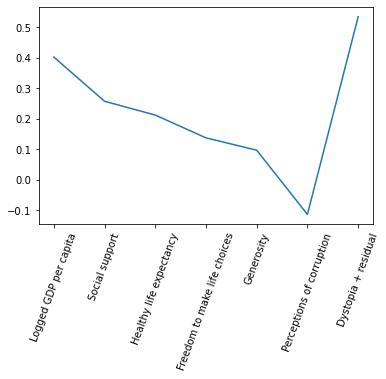

In [14]:
lasso_coef = lasso.coef_


plt.plot(range(len(data.columns)), lasso_coef)
plt.xticks(range(len(data.columns)), data.columns.values, rotation=70);

In [13]:
pred_test = lasso.predict(X_test)

print('score test :', lasso.score(X_test, y_test))
print('mse test :', mean_squared_error(pred_test, y_test))

score test : 0.9999971455609298
mse test : 3.1471828436410572e-06
